# 1. SIFT(Scale Invariant Feature Transform)  

- 특징 기술자  
① 크기에 불변한(scale invariant) key point들을 검출  
② 각 keypoint의 주변에 윈도우를 만들어 지배(dominant) 방향을 계산  
③ 각 keypoint 주변에 적절한 크기의 윈도우를 씌운 후 16(4×4)개 block으로 분할하여 block마다 8개 bin을 갖는 히스토그램을 생성 => 16×8 = 128 길이의 특징 벡터 생성 (이 때, 각 block의 각도 bin에서 ②에서 구한 key point의 지배 방향이 기준이 되도록 설정함으로써 방향 불변성 달성)

<br>

- 특징
  - 이동(translation), 크기(scale) 및 회전(rotation)에 불변인 특징 검출 방법

#### Tip  
- OpenCV 공식 버전에는 SIFT, SURF 등 특허 등록된 알고리즘은 포함되어 있지 않으므로, **opencv-contrib-python==3.4.2.16** 버전을 추가로 설치해야 함

#### Reference
[link #1 - blog](https://bskyvision.com/21)  
[link #2 - OpenCV tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html)

# 2. Application
## 1) Keypoint detection and visualization

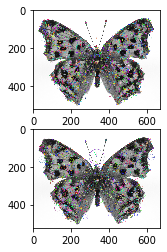

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('butterfly.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## SIFT 검출기 생성
sift = cv2.xfeatures2d.SIFT_create()

## SIFT 특징 검출
keypoints = sift.detect(image=gray, 
                        mask=None)

## keypoint 시각화
## https://docs.opencv.org/2.4/modules/features2d/doc/drawing_function_of_keypoints_and_matches.html#drawkeypoints
res = cv2.drawKeypoints(image = gray, 
                        keypoints = keypoints,
                        outImage = None)

res_with_rich = cv2.drawKeypoints(image = gray, 
                                  keypoints = keypoints,
                                  outImage = None,
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(2,1,1)
plt.imshow(res)
plt.subplot(2,1,2)
plt.imshow(res_with_rich)

#cv2.imshow('keypoints', res)
#cv2.imshow('keypoints_with_size_and_orientation', res_with_rich)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## 2) Feature matching

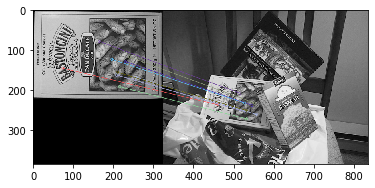

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 불러오기
img_query = cv2.imread('box.png')           # query image

# ## 이미지 회전, 크기 변환 적용
# height, width = img_query.shape[:2]
# M = cv2.getRotationMatrix2D(center = (width/2, height/2),
#                             angle = -90,
#                             scale = 1.0)
# img_query = cv2.warpAffine(src = img_query, 
#                            M = M,
#                            dsize = (width, height))

img_train = cv2.imread('box_in_scene.png')  # train image
gray_query = cv2.cvtColor(img_query, cv2.COLOR_BGR2GRAY)
gray_train = cv2.cvtColor(img_train, cv2.COLOR_BGR2GRAY)

## SIFT 검출기 생성
sift = cv2.xfeatures2d.SIFT_create()

## SIFT 기반 keypoint 검출 및 descriptor 생성
kp_query, des_query = sift.detectAndCompute(image = gray_query,
                                  mask = None)
kp_train, des_train = sift.detectAndCompute(gray_train, None)

## BFMatcher 객체 생성
bf = cv2.BFMatcher(normType = cv2.NORM_L2,
                   crossCheck = False)

## descriptor 간 매칭 수행
matches = bf.match(queryDescriptors = des_query,
                   trainDescriptors = des_train)

## distance를 기준으로 오름차순 정렬
matches = sorted(matches, key = lambda x:x.distance)

## 첫 10개의 매칭만 그리기
## https://docs.opencv.org/2.4/modules/features2d/doc/drawing_function_of_keypoints_and_matches.html#drawmatches
res = cv2.drawMatches(img1 = img_query,
                      keypoints1 = kp_query,
                      img2 = img_train,
                      keypoints2 = kp_train,
                      matches1to2 = matches[:10],
                      outImg = None,
                      flags = 2)

plt.imshow(res)
#cv2.imshow('result', res)
#cv2.waitKey(0)
#cv2.destroyAllWindows()